In [3]:
# Importing relevant libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
import ta 

In [4]:
# Load the dataset
#data = pd.read_csv('/Users/saimasultana/AAPL.csv')
data = pd.read_csv(data_path)

In [6]:
# Sort the data by date
data = data.sort_values(by='Date')

In [7]:
# Calculate Daily Returns
data['Daily_Return'] = data['Close'].pct_change()

In [8]:
# Calculate Volatility (Standard Deviation of Daily Returns)
window_size = 20  # You can adjust the window size as needed
data['Volatility'] = data['Daily_Return'].rolling(window=window_size).std()

In [9]:
# Calculate Moving Averages
data['SMA_20'] = ta.trend.sma_indicator(data['Close'], window=20)  # 20-day Simple Moving Average
data['SMA_50'] = ta.trend.sma_indicator(data['Close'], window=50)  # 50-day Simple Moving Average

In [10]:
# Drop rows with NaN values
data.dropna(inplace=True)

In [11]:
# Select Features
features = ['Open', 'High', 'Low', 'Volume', 'SMA_20', 'SMA_50', 'Volatility']  # Select relevant features
X = data[features]
y = data['Close']  # Predicting the closing price

In [12]:
# Split the data into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# Initialising neural models
mlp_regressor = MLPRegressor(hidden_layer_sizes=(100,50),
                             activation = 'relu',
                             solver = 'adam',
                             max_iter=500,
                             random_state=42)
                

In [15]:
# Fit the model
mlp_regressor.fit(X_train_scaled, y_train)

MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

In [16]:
# Predict the target variable on the test set
y_pred = mlp_regressor.predict(X_test_scaled)

In [17]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
NN_rmse = np.sqrt(mse)
NN_r2 = r2_score(y_test, y_pred)

print('Root Mean Squared Error:', NN_rmse)
print('R-Squared Score:', NN_r2)

Root Mean Squared Error: 4.198652829376599
R-Squared Score: 0.10544575519781385


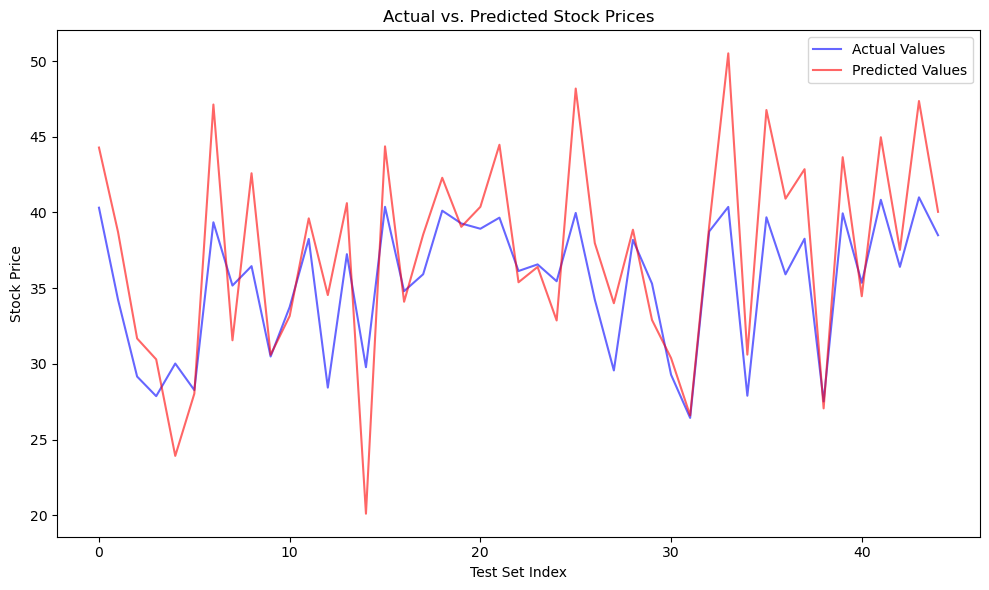

In [18]:
# Plotting the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Values', color='blue', alpha=0.6)
plt.plot(y_pred, label='Predicted Values', color='red', alpha=0.6)
plt.title('Actual vs. Predicted Stock Prices')
plt.xlabel('Test Set Index')
plt.ylabel('Stock Price')
plt.legend()
plt.tight_layout()